In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

In [2]:
#Xk = np.array([0, 0.1, 0.3, 0.4, 0.54, 0.6, 0.8, 0.95, 0.97, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
Xk = np.linspace(0,1,50)
Mi = len(Xk)                     # Number of nodes
T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
H = Xk[1:]-Xk[:-1]               # Element sizes
Mk = Mi-1                        # Number of elements

In [3]:
print("\nNodes: ",Xk,"\n\nNumber of nodes: Mi = ", Mi)
print("\nCollection of elements ('triangulation'):\n\n T = \n\n",T,"\n\nNumber of elements: Mk = ", Mk,"\n\nElement sizes: H = ",H)


Nodes:  [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ] 

Number of nodes: Mi =  50

Collection of elements ('triangulation'):

 T = 

 [[0.         0.02040816]
 [0.02040816 0.04081633]
 [0.04081633 0.06122449]
 [0.06122449 0.08163265]
 [0.08163265 0.10204082]
 [0.10204082 0.12244898]
 [0.12244898 0.14285714]
 [0.14285714 0.16326531]
 [0.16326531 0.18367347]
 [0.18367347 0.20408163]
 [0.20408163 0.2244898 ]
 [0.2244898  0.24489796]
 [0.24489796 0.26530612]
 [0.26530612 0.28571429]
 [

In [4]:
def loc2glob(k,alpha):
    return k+alpha          # Numbering k from 0

In [113]:
def func(x, consts):
    alpha, b, c = consts
    return 2 * alpha + b * (1 - 2*x) + c * (x - x**2)

In [174]:
def elemental_stiffness_matrix(consts, h):
    alpha, b, c = consts
    return np.array([[alpha/h + b/2 + h*c/3, -alpha/h - b/2 + h*c/6],
                    [-alpha/h + b/2 + h*c/6, alpha/h - b/2 + h*c/3]])

def elemental_load(x1, x2, consts):
    h = x2 - x1
    f = np.zeros(2)
    f[0] = integrate.quad(lambda x: func(x, consts) * (x2 - x) / h, x1, x2)[0]
    f[1] = integrate.quad(lambda x: func(x, consts) * (x - x1) / h, x1, x2)[0]
    return f

In [195]:
A = np.zeros((Mi,Mi))
f = np.zeros((Mi))
alpha,b,c = 2,1,5
consts = [alpha, b, c]


for k in range(0,Mk):
    """A[k, k-1] = (c * (hi / 6) + (b / 2) - (alpha / hi))
    A[k, k] = c * (hi + hip1) / 3 + alpha * (1/hi + 1/hip1)
    A[k, k+1] = ((c * hip1 / 6) + (b / 2) - (alpha / hip1))
"""
    #f1 = lambda x: func(x, consts) * (x - Xk[k-1]) / hi
    #f2 = lambda x: func(x, consts) * (Xk[k+1] - x) / hip1

    Ak = elemental_stiffness_matrix(consts, H[k])
    fk = elemental_load(Xk[k], Xk[k+1], consts)
    for gamma in range(2):
        i = loc2glob(k,gamma)
        for beta in range(2):
            j = loc2glob(k,beta)
            A[i,j] += Ak[gamma,beta]
        f[i] += fk[gamma]

"""for k in range(1,Mk):
    hi = H[k-1]
    hip1 = H[k]
    def f1(x):
        return func(x, consts) * (x - Xk[k-1]) / hi
    
    def f2(x):
        return func(x, consts) * (Xk[k+1] - x) / hip1
    
    xtest = np.linspace(Xk[k-1], Xk[k], 10)
    plt.plot(xtest, f1(xtest))
    xtest = np.linspace(Xk[k], Xk[k+1], 10)
    plt.plot(xtest, f2(xtest))

    f[k] = (integrate.quad(f1, Xk[k-1], Xk[k])[0] + integrate.quad(f2, Xk[k], Xk[k+1])[0])
"""

'for k in range(1,Mk):\n    hi = H[k-1]\n    hip1 = H[k]\n    def f1(x):\n        return func(x, consts) * (x - Xk[k-1]) / hi\n    \n    def f2(x):\n        return func(x, consts) * (Xk[k+1] - x) / hip1\n    \n    xtest = np.linspace(Xk[k-1], Xk[k], 10)\n    plt.plot(xtest, f1(xtest))\n    xtest = np.linspace(Xk[k], Xk[k+1], 10)\n    plt.plot(xtest, f2(xtest))\n\n    f[k] = (integrate.quad(f1, Xk[k-1], Xk[k])[0] + integrate.quad(f2, Xk[k], Xk[k+1])[0])\n'

In [196]:
# Impose boundary condition
# Dirichlet boundary conditions
A[0,:] = 0;
A[0,0] = 1
f[0] = 0
A[-1,:] = 0
A[-1,-1] = 1
f[-1] = 0
print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=3, out=None))

A=
 [[  1.    0.    0.  ...   0.    0.    0. ]
 [-97.5 196.1 -98.5 ...   0.    0.    0. ]
 [  0.  -97.5 196.1 ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ... 196.1 -98.5   0. ]
 [  0.    0.    0.  ... -97.5 196.1 -98.5]
 [  0.    0.    0.  ...   0.    0.    1. ]] 

 f= [0.    0.103 0.104 0.105 0.106 0.107 0.108 0.109 0.109 0.11  0.11  0.111
 0.111 0.111 0.111 0.111 0.111 0.111 0.111 0.11  0.11  0.11  0.109 0.108
 0.108 0.107 0.106 0.105 0.104 0.103 0.101 0.1   0.098 0.097 0.095 0.094
 0.092 0.09  0.088 0.086 0.084 0.082 0.08  0.077 0.075 0.072 0.07  0.067
 0.064 0.   ]


In [197]:
U = np.linalg.solve(A,f)

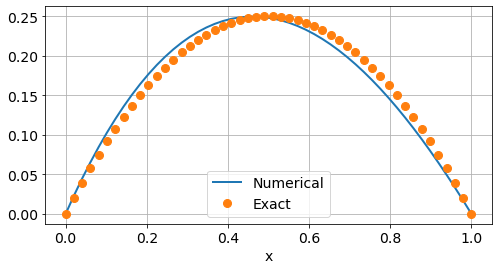

In [198]:
plt.plot(Xk, U, Xk, Xk * (1-Xk), 'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');

In [11]:
def func2(x, consts):
    alpha, b, c = consts
    return 9 * np.pi**2 * alpha * np.sin(3*np.pi*x) + 3 * np.pi * b * np.cos(3*np.pi*x) + c* np.sin(3*np.pi * x)

In [12]:
A2 = np.zeros((Mi,Mi))
f = np.zeros((Mi))
alpha,b,c = 2,1,1
consts = [alpha, b, c]
for k in range(1,Mk):
    hi = H[k-1]
    hip1 = H[k]
    A2[k, k-1] = c * (hi / 6) + (b / 2) - (alpha / hi)
    A2[k, k] = c * (hi + hip1) / 3 + alpha * (1/hi + 1/hip1)
    A2[k, k+1] = (c * hip1 / 6) + (b / 2) - (alpha / hip1)

    #f1 = lambda x: func(x, consts) * (x - Xk[k-1]) / hi
    #f2 = lambda x: func(x, consts) * (Xk[k+1] - x) / hip1
 
    def f1(x):
        return func2(x, consts) * (x - Xk[k-1]) / hi
    
    def f2(x):
        return func2(x, consts) * (Xk[k+1] - x) / hip1
    """xtest = np.linspace(Xk[k-1], Xk[k], 10)
    plt.plot(xtest, f1(xtest))
    xtest = np.linspace(Xk[k], Xk[k+1], 10)
    plt.plot(xtest, f2(xtest))"""

    f[k] = (integrate.quad(f1, Xk[k-1], Xk[k])[0] + integrate.quad(f2, Xk[k], Xk[k+1])[0])
    
xtest = np.linspace(0,1,50)
#plt.plot(xtest, func(xtest, consts))

In [13]:
# Impose boundary condition
# Dirichlet boundary conditions
A2[0,:] = 0;
A2[0,0] = 1
f[0] = 0
A2[-1,:] = 0
A2[-1,-1] = 1
f[-1] = 0
print("A=\n", np.around(A2,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=3, out=None))

A=
 [[  1.    0.    0.  ...   0.    0.    0. ]
 [-97.5 196.  -97.5 ...   0.    0.    0. ]
 [  0.  -97.5 196.  ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ... 196.  -97.5   0. ]
 [  0.    0.    0.  ... -97.5 196.  -97.5]
 [  0.    0.    0.  ...   0.    0.    1. ]] 

 f= [ 0.     0.883  1.542  2.144  2.666  3.091  3.401  3.586  3.639  3.558
  3.345  3.009  2.562  2.02   1.404  0.736  0.042 -0.655 -1.327 -1.951
 -2.502 -2.961 -3.311 -3.539 -3.636 -3.6   -3.43  -3.134 -2.722 -2.21
 -1.617 -0.963 -0.275  0.424  1.107  1.75   2.328  2.82   3.208  3.477
  3.619  3.627  3.501  3.246  2.871  2.391  1.822  1.186  0.507  0.   ]


In [14]:
print(A-A2)

[[  0.   0.   0. ...   0.   0.   0.]
 [ 48. -97.  48. ...   0.   0.   0.]
 [  0.  48. -97. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... -97.  48.   0.]
 [  0.   0.   0. ...  48. -97.  48.]
 [  0.   0.   0. ...   0.   0.   0.]]


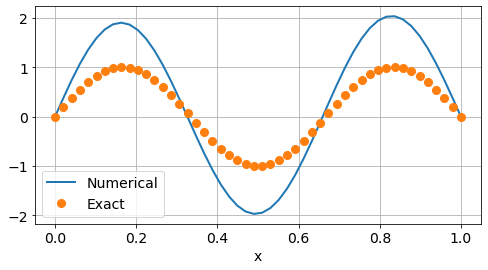

In [15]:
U = np.linalg.solve(A,f)
plt.plot(Xk, U, Xk, np.sin(3*np.pi*Xk), 'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');

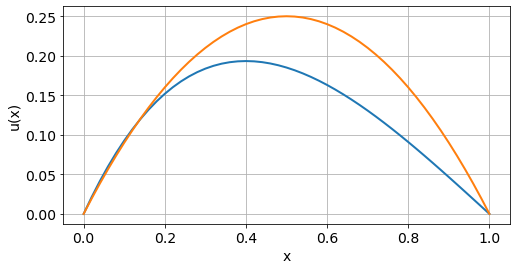

In [18]:
# Define the differential equation and its coefficients

alpha,b,c = 2/3,4/3,-2/3

consts = [alpha, b, c]
# Define the element stiffness matrix
def ke(x1, x2):
    h = x2 - x1
    k = np.zeros((2, 2))
    k[0, 0] = alpha / h + b * h / 3 + c * h / 6
    k[0, 1] = -alpha / h + b * h / 6 - c * h / 6
    k[1, 0] = -alpha / h + b * h / 6 - c * h / 6
    k[1, 1] = alpha / h + b * h / 3 + c * h / 6
    return k

# Define the element load vector
def fe(x1, x2):
    h = x2 - x1
    f = np.zeros(2)
    f[0] = integrate.quad(lambda x: func(x, consts) * (x - x1) / h, x1, x2)[0]
    f[1] = integrate.quad(lambda x: func(x, consts) * (x2 - x) / h, x1, x2)[0]
    return f

# Define the global stiffness matrix and load vector
n = 50 # Number of elements

x = np.linspace(0, 1, n+1) # Node locations
k_global = np.zeros((n+1, n+1))
f_global = np.zeros(n+1)
for i in range(n):
    k_global[i:i+2, i:i+2] += ke(x[i], x[i+1])
    f_global[i:i+2] += fe(x[i], x[i+1])

# Apply Dirichlet boundary conditions
k_global[0,:] = 0
k_global[0,0] = 1
f_global[0] = 0
k_global[-1,:] = 0
k_global[-1,-1] = 1
f_global[-1] = 0

# Solve the linear system
u = np.linalg.solve(k_global, f_global)

# Plot the solution
plt.plot(x, u)
plt.plot(x, x-x**2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.show()